# Building a CNN using Keras for Classification on the Given Dataset

### By: Harsh Sagar Garg

### Imports

In [0]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import pickle
import matplotlib.pyplot as plt
import io

### Data Preperation

In [97]:
uploaded = files.upload()

Saving trainX.pickle to trainX (4).pickle


In [98]:
upload =  files.upload()

Saving trainY.pickle to trainY (3).pickle


In [106]:
#r=open("trainX.pickle",'rb')
#X=pickle.load(r)

#r2=open("trainY.pickle","rb")
#y=pickle.load(r2)

X= pd.read_pickle(io.BytesIO(uploaded['trainX.pickle']),compression=None)
y= pd.read_pickle(io.BytesIO(upload['trainY.pickle']),compression=None)


print(X.shape,y.shape) # 10 classes in y

(60000, 28, 28) (60000,)


In [107]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Checking how many examples are there for each class

In [108]:
np.unique(y, return_counts=True) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

#### As ^ we can see above, there are 6000 examples of each class, so Dataset is well balanced

In [109]:
## Reshaping it, because CNN accepts inputs in the form of an image
## We have 60k images, but we can also put -1 if in case we are not sure


X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)



(60000, 28, 28, 1) (60000, 10)


# CNN MODEL

In [117]:
'''
## We are creating a model object, which will be a sequential model. And then we can use add to add different types of layers to model
model = Sequential()

## 1st layer is a Convolutional Layer : 32 Filters, each of size (3,3)
## Filters that this convolution layer will use, they are going to be trained : we won't give any hardcoded filters
## For the first layer, we also need to specify what kind of input its going to get
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

## Adding another Convolution Layer  : 64 Filters, each of (3,3)
model.add(Convolution2D(64,(3,3),activation='relu'))

## Adding a Dropout Layer : We are randomly going to drop 25% neurons from the previous layer
model.add(Dropout(0.25))

## Adding MaxPooling Layer  : there are no filters in this layer, but tsill we have to specify the filter size
model.add(MaxPooling2D(2,2))

## Adding another Convolution Layer : 32 Filters, ecah of size (5,5)
model.add(Convolution2D(32,(5,5),activation='relu'))

## Adding one more Convolution Layer : 8 Filters, each of size (5,5)
model.add(Convolution2D(8,(5,5),activation='relu'))

## Add Flatten Layer : Its actually not a layer, its kind of a reshape funtion
## Its going to make the 3D volume into a linear layer
model.add(Flatten())

## Dense layer : Having 10 neurons, so that we can predict the output for 10 Classes
model.add(Dense(10,activation='softmax'))

model.summary()

'''


model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)               0         
__________

### Applying Filters again and again reduces the ouput size^ which is evident above

#### We have reduced our parameters a lot ^
#### Now it has only 77,746 parameters 
#### And the complete dataset (test+train) has 70,000 examples, Which means it is very UNLIKELY TO DO OVERFITTING
#### Also we are using Dropouts, which act as a regulariser and prevents overfitting

In [0]:
# Compile Every Keras Model
## we are using adam instead of sgd optimiser
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [119]:
hist = model.fit(X_train,Y_train,epochs=10,shuffle=True,batch_size=256,validation_split=0.20)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 178s 4ms/step - loss: 2.0554 - acc: 0.3130 - val_loss: 1.4435 - val_acc: 0.4876
Epoch 2/10
48000/48000 [==============================] - 177s 4ms/step - loss: 1.2088 - acc: 0.5859 - val_loss: 0.8636 - val_acc: 0.7149
Epoch 3/10
48000/48000 [==============================] - 176s 4ms/step - loss: 0.6860 - acc: 0.7607 - val_loss: 0.5927 - val_acc: 0.7938
Epoch 4/10
48000/48000 [==============================] - 175s 4ms/step - loss: 0.5397 - acc: 0.8106 - val_loss: 0.4982 - val_acc: 0.8289
Epoch 5/10
48000/48000 [==============================] - 176s 4ms/step - loss: 0.4552 - acc: 0.8405 - val_loss: 0.4670 - val_acc: 0.8411
Epoch 6/10
48000/48000 [==============================] - 176s 4ms/step - loss: 0.4080 - acc: 0.8551 - val_loss: 0.4180 - val_acc: 0.8543
Epoch 7/10
48000/48000 [==============================] - 176s 4ms/step - loss: 0.3745 - acc: 0.8681 - val_loss: 0.3963 - 

## In just 10 EPOCHs the Accuracy Score is Amost 90%

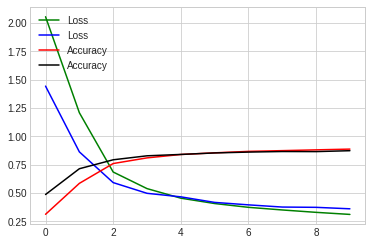

In [123]:
plt.figure(0)
plt.style.use('seaborn-whitegrid')
plt.plot(hist.history['loss'],'g',label='Loss')
plt.plot(hist.history['val_loss'],'b',label='Loss')

plt.plot(hist.history['acc'],'r',label='Accuracy')
plt.plot(hist.history['val_acc'],'black', label='Accuracy')
plt.legend(loc='upper left')
plt.show()


In [124]:
uploaded =  files.upload()

Saving testX.pickle to testX (1).pickle


In [0]:
Xt= pd.read_pickle(io.BytesIO(uploaded['testX.pickle']),compression=None)

In [0]:

X_test = Xt.reshape((-1,28,28,1))

In [0]:
y_pred=model.predict(X_test)

In [129]:
y_pred

array([[5.1016130e-13, 3.6744140e-13, 1.5850197e-12, ..., 1.1242867e-03,
        4.8344744e-15, 9.9878103e-01],
       [9.4499352e-04, 2.5743450e-09, 9.8451060e-01, ..., 1.7105340e-05,
        3.9040434e-04, 1.3486584e-06],
       [2.2183626e-04, 9.9969137e-01, 7.2873868e-12, ..., 5.5020411e-14,
        3.9247636e-15, 1.6387959e-15],
       ...,
       [4.7531378e-07, 1.7363387e-12, 1.1672558e-08, ..., 2.7668877e-08,
        9.9999261e-01, 2.5267680e-06],
       [3.4774739e-06, 9.9997985e-01, 2.8524321e-13, ..., 1.0814966e-14,
        9.6964970e-17, 4.8719677e-17],
       [4.0455656e-05, 8.6368836e-06, 5.0276241e-05, ..., 3.3591995e-01,
        4.3786801e-03, 6.9477726e-03]], dtype=float32)

In [0]:
pickle_output = open("predictions.pickle","wb")
pickle.dump(y_pred, pickle_output)